In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import operator
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
data = pd.read_csv("Social_Network_Ads.csv")
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Train test split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1].values, data.iloc[:, -1].values, test_size=0.2, random_state=42)

## Scaling

In [5]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## KNN code

In [6]:
class KNearestNeighbours:
    def __init__(self, k):
        self.k = k
        
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        
    def predict(self, x_test):
        labels = []
        distance = {}
        count = 0
        
        for test in x_test:
            for i in self.x_train:
                distance[count] = np.sqrt(np.sum(np.square(test-i)))
                count += 1

            distance_sorted = sorted(distance.items(), key=operator.itemgetter(1))
            labels.append(self.classify(distance_sorted[:self.k]))
            distance.clear()
            count = 0
        return labels
        
    def classify(self, distance):
        labels = []
        
        for i in distance:
            labels.append(self.y_train[i[0]])
        return Counter(labels).most_common()[0][0]

In [27]:
knn = KNearestNeighbours(25)
knn.fit(x_train_scaled, y_train)


# def predict_new():
#     age = int(input("Enter age : "))
#     salary = int(input("Enter salary : "))
#     x_new = np.array([age, salary]).reshape(1,2)
    
# x_new = scaler.transform(x_new)
results = knn.predict(x_test_scaled)

print(results)
#     if result == 1:
#         print("Will purchase")
#     else:
#         print("Will not purchase")

# predict_new()
accuracy_score(y_test, results)

[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0]


0.9375

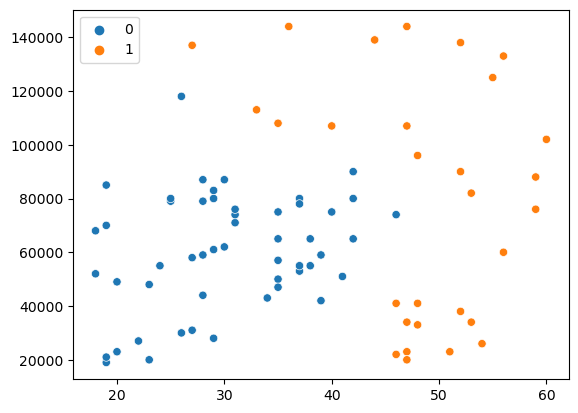

In [33]:
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=np.array(results))
plt.show()

<Axes: >

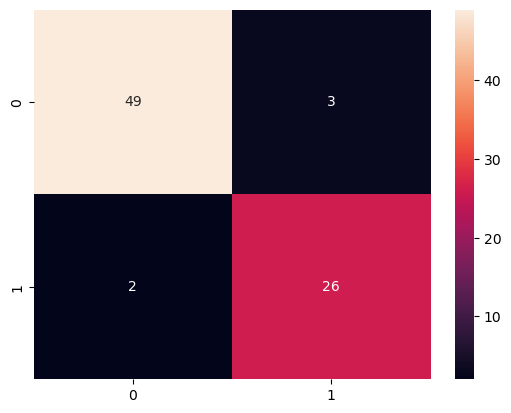

In [29]:
sns.heatmap(confusion_matrix(y_test, results), annot=True)

In [30]:
print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.90      0.93      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

